In [105]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
%matplotlib inline

In [10]:
#Enter original data from the problem
X = [0.0, 0.2, 0.4, 0.6, 0.65]
Y = [1.28, 0.94, 0.85, 1.32, 2.0] #Fa0/-rA (processed data)

(0.5, 2.2)

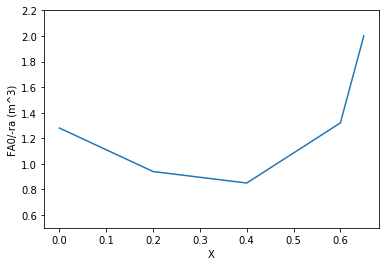

In [32]:
#Plot the original data
plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("FA0/-ra (m^3)")
plt.ylim([0.5, 2.2])

Since there is downward curvature in the first part of the plot, we will use a CSTR for that, then switch to a PFR at the minimum. The volume of the CSTR is easy to calculate. Just multiply X by Fa0/-rA

In [116]:
X_CSTR = X[2]
LV_CSTR = Y[2]
V_CSTR = X_CSTR*LV_CSTR #m^3
print(V_CSTR)

0.34


The PFR is a little more tricky, as we have to numerically integrate the area under the curve for the part between X=0.4-0.65

Text(0, 0.5, 'FA0/-rA')

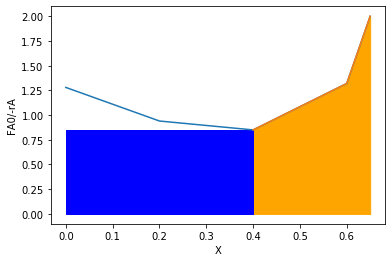

In [122]:
#Linearly interpolate in the PFR range to generate more data points for numerical integration
X_PFR = X[2:] #Only take the points past the minimum
Y_PFR = Y[2:]
X_int = np.linspace(min(X_PFR),max(X_PFR),100)
Y_int = np.interp(X_int,X_PFR,Y_PFR)
plt.plot(X,Y,label="Original Data")
plt.plot(X_int,Y_int, label="Interpolated Data")
plt.fill_between(X_int,Y_int,color='orange') #PFR volume
plt.fill_between([X[0],X_CSTR],[LV_CSTR,LV_CSTR],color='blue')
plt.xlabel('X')
plt.ylabel('FA0/-rA')
#plt.legend()

In [110]:
#Integrate the area under the curve for the PFR 
V_PFR = trapz(Y_int,X_int)
print("PFR volume is")
print(V_PFR)
print("m^3")

PFR volume is
0.30000573921028467
m^3


In [112]:
print("Total volume of both reactors is")
print(V_CSTR+V_PFR)
print("m^3")

Total volume of both reactors is
0.6400057392102847
m^3
